In [1]:
import pandas as pd 

In [2]:
CCTV_Seoul = pd.read_excel('/Users/Ica/Desktop/DataScience/data/01. CCTV_in_Seoul.xlsx', encoding='utf-8')
CCTV_Seoul.head() 

,기관명,소계,2013년 이전,2014년,2015년,2016년,2017년
0,강남구,4758,1979,474,760,770,775
1,관악구,3223,1511,406,593,352,361
2,구로구,2746,1434,189,256,326,541
3,서대문구,2705,1808,114,109,266,408
4,성동구,2554,1953,159,98,39,305


In [3]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년 이전', '2014년', '2015년', '2016년', '2017년'], dtype='object')

In [4]:
CCTV_Seoul.columns[0]

'기관명'

In [5]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)
CCTV_Seoul.head() 

,구별,소계,2013년 이전,2014년,2015년,2016년,2017년
0,강남구,4758,1979,474,760,770,775
1,관악구,3223,1511,406,593,352,361
2,구로구,2746,1434,189,256,326,541
3,서대문구,2705,1808,114,109,266,408
4,성동구,2554,1953,159,98,39,305


In [6]:
pop_Seoul = pd.read_excel('/Users/Ica/Desktop/DataScience/data/01. population_in_Seoul.xls')
pop_Seoul.head() 

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.3/4,합계,4219001,10158411,4975437,5182974,9891448,4849195,5042253,266963,126242,140721,2.34,1353486
3,2017.3/4,종로구,73668,164640,80173,84467,155109,76155,78954,9531,4018,5513,2.11,26034
4,2017.3/4,중구,60130,134174,66064,68110,125332,62011,63321,8842,4053,4789,2.08,21249


In [7]:
pop_Seoul = pd.read_excel('/Users/Ica/Desktop/DataScience/data/01. population_in_Seoul.xls',
                         header = 2,
                         parse_cols = 'B, D, G, J, N',
                         encoding='utf-8') 
pop_Seoul.head() 

C:\Users\Ica\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  after removing the cwd from sys.path.


,자치구,계,계.1,계.2,65세이상고령자
0,합계,10158411.0,9891448.0,266963.0,1353486.0
1,종로구,164640.0,155109.0,9531.0,26034.0
2,중구,134174.0,125332.0,8842.0,21249.0
3,용산구,243922.0,228960.0,14962.0,36727.0
4,성동구,312933.0,304879.0,8054.0,40902.0


In [8]:
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별',
                          pop_Seoul.columns[1] : '인구수',
                          pop_Seoul.columns[2] : '한국인',
                          pop_Seoul.columns[3] : '외국인',
                          pop_Seoul.columns[4] : '고령자'}, inplace=True)
pop_Seoul.head() 

,구별,인구수,한국인,외국인,고령자
0,합계,10158411.0,9891448.0,266963.0,1353486.0
1,종로구,164640.0,155109.0,9531.0,26034.0
2,중구,134174.0,125332.0,8842.0,21249.0
3,용산구,243922.0,228960.0,14962.0,36727.0
4,성동구,312933.0,304879.0,8054.0,40902.0


In [9]:
CCTV_Seoul.head()

,구별,소계,2013년 이전,2014년,2015년,2016년,2017년
0,강남구,4758,1979,474,760,770,775
1,관악구,3223,1511,406,593,352,361
2,구로구,2746,1434,189,256,326,541
3,서대문구,2705,1808,114,109,266,408
4,성동구,2554,1953,159,98,39,305


In [10]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5) 

,구별,소계,2013년 이전,2014년,2015년,2016년,2017년
24,도봉구,899,480,185,49,102,83
23,강북구,946,472,70,147,257,0
22,중랑구,1053,751,64,102,75,61
21,강서구,1202,634,52,177,168,171
20,송파구,1203,865,24,124,88,102


In [11]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5) 

,구별,소계,2013년 이전,2014년,2015년,2016년,2017년
0,강남구,4758,1979,474,760,770,775
1,관악구,3223,1511,406,593,352,361
2,구로구,2746,1434,189,256,326,541
3,서대문구,2705,1808,114,109,266,408
4,성동구,2554,1953,159,98,39,305


In [12]:
# 최근 3년간 (2015년 - 2017년) CCTV 증가율 계산 
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2017년'] + CCTV_Seoul['2016년'] + \
                       CCTV_Seoul['2015년']) / (CCTV_Seoul['2014년'] + CCTV_Seoul['2013년 이전']) * 100
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5) 

,구별,소계,2013년 이전,2014년,2015년,2016년,2017년,최근증가율
10,서초구,1868,253,239,624,474,278,279.674797
14,노원구,1576,627,80,461,298,110,122.913720
0,강남구,4758,1979,474,760,770,775,93.966572
13,마포구,1743,838,65,164,334,342,93.023256
21,강서구,1202,634,52,177,168,171,75.218659


In [13]:
pop_Seoul.head() 

,구별,인구수,한국인,외국인,고령자
0,합계,10158411.0,9891448.0,266963.0,1353486.0
1,종로구,164640.0,155109.0,9531.0,26034.0
2,중구,134174.0,125332.0,8842.0,21249.0
3,용산구,243922.0,228960.0,14962.0,36727.0
4,성동구,312933.0,304879.0,8054.0,40902.0


In [14]:
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head() 

,구별,인구수,한국인,외국인,고령자
1,종로구,164640.0,155109.0,9531.0,26034.0
2,중구,134174.0,125332.0,8842.0,21249.0
3,용산구,243922.0,228960.0,14962.0,36727.0
4,성동구,312933.0,304879.0,8054.0,40902.0
5,광진구,372414.0,357743.0,14671.0,43579.0


In [15]:
pop_Seoul['구별'].unique() 

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [16]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [17]:
pop_Seoul.drop([26], inplace=True)
pop_Seoul.head() 

,구별,인구수,한국인,외국인,고령자
1,종로구,164640.0,155109.0,9531.0,26034.0
2,중구,134174.0,125332.0,8842.0,21249.0
3,용산구,243922.0,228960.0,14962.0,36727.0
4,성동구,312933.0,304879.0,8054.0,40902.0
5,광진구,372414.0,357743.0,14671.0,43579.0


In [18]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head() 

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164640.0,155109.0,9531.0,26034.0,5.788994,15.812682
2,중구,134174.0,125332.0,8842.0,21249.0,6.589950,15.836898
3,용산구,243922.0,228960.0,14962.0,36727.0,6.133928,15.056862
4,성동구,312933.0,304879.0,8054.0,40902.0,2.573714,13.070529
5,광진구,372414.0,357743.0,14671.0,43579.0,3.939433,11.701762


In [19]:
pop_Seoul.sort_values(by='인구수', ascending=False).head(5) 

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,668366.0,661750.0,6616.0,75301.0,0.989877,11.266432
16,강서구,607877.0,601391.0,6486.0,75046.0,1.066992,12.345590
23,강남구,565731.0,560827.0,4904.0,64579.0,0.866843,11.415143
11,노원구,562278.0,558432.0,3846.0,73588.0,0.684003,13.087476
21,관악구,522849.0,505188.0,17661.0,69486.0,3.377839,13.289879


In [20]:
pop_Seoul.sort_values(by='외국인', ascending=False).head(5) 

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,401908.0,368818.0,33090.0,53620.0,8.233228,13.341362
17,구로구,443288.0,412972.0,30316.0,58260.0,6.838895,13.142697
18,금천구,253646.0,235608.0,18038.0,33818.0,7.111486,13.332755
21,관악구,522849.0,505188.0,17661.0,69486.0,3.377839,13.289879
6,동대문구,367769.0,352011.0,15758.0,55287.0,4.284755,15.033078


In [21]:
pop_Seoul.sort_values(by='외국인비율', ascending=False).head(5) 

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,401908.0,368818.0,33090.0,53620.0,8.233228,13.341362
18,금천구,253646.0,235608.0,18038.0,33818.0,7.111486,13.332755
17,구로구,443288.0,412972.0,30316.0,58260.0,6.838895,13.142697
2,중구,134174.0,125332.0,8842.0,21249.0,6.589950,15.836898
3,용산구,243922.0,228960.0,14962.0,36727.0,6.133928,15.056862


In [22]:
pop_Seoul.sort_values(by='고령자', ascending=False).head(5) 

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,668366.0,661750.0,6616.0,75301.0,0.989877,11.266432
16,강서구,607877.0,601391.0,6486.0,75046.0,1.066992,12.345590
12,은평구,491899.0,487507.0,4392.0,73850.0,0.892866,15.013245
11,노원구,562278.0,558432.0,3846.0,73588.0,0.684003,13.087476
21,관악구,522849.0,505188.0,17661.0,69486.0,3.377839,13.289879


In [23]:
pop_Seoul.sort_values(by='고령자비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,329042.0,325552.0,3490.0,56078.0,1.060655,17.042809
2,중구,134174.0,125332.0,8842.0,21249.0,6.589950,15.836898
1,종로구,164640.0,155109.0,9531.0,26034.0,5.788994,15.812682
10,도봉구,347338.0,345293.0,2045.0,52909.0,0.588764,15.232713
3,용산구,243922.0,228960.0,14962.0,36727.0,6.133928,15.056862


In [24]:
import pandas as pd
import numpy as np 

In [25]:
pop_Seoul

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164640.0,155109.0,9531.0,26034.0,5.788994,15.812682
2,중구,134174.0,125332.0,8842.0,21249.0,6.589950,15.836898
3,용산구,243922.0,228960.0,14962.0,36727.0,6.133928,15.056862
4,성동구,312933.0,304879.0,8054.0,40902.0,2.573714,13.070529
5,광진구,372414.0,357743.0,14671.0,43579.0,3.939433,11.701762
6,동대문구,367769.0,352011.0,15758.0,55287.0,4.284755,15.033078
7,중랑구,414554.0,410109.0,4445.0,58675.0,1.072237,14.153765
8,성북구,458261.0,446457.0,11804.0,65937.0,2.575825,14.388525
9,강북구,329042.0,325552.0,3490.0,56078.0,1.060655,17.042809
10,도봉구,347338.0,345293.0,2045.0,52909.0,0.588764,15.232713


In [26]:
CCTV_Seoul

,구별,소계,2013년 이전,2014년,2015년,2016년,2017년,최근증가율
0,강남구,4758,1979,474,760,770,775,93.966572
1,관악구,3223,1511,406,593,352,361,68.127282
2,구로구,2746,1434,189,256,326,541,69.192853
3,서대문구,2705,1808,114,109,266,408,40.738814
4,성동구,2554,1953,159,98,39,305,20.928030
5,은평구,2505,1351,343,210,358,243,47.874852
6,양천구,2498,1701,164,178,338,117,33.941019
7,용산구,2379,2071,97,76,77,58,9.732472
8,성북구,2221,1155,208,263,357,238,62.949376
9,종로구,1925,1324,167,163,129,142,29.107981


In [27]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head() 

,구별,소계,2013년 이전,2014년,2015년,2016년,2017년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,4758,1979,474,760,770,775,93.966572,565731.0,560827.0,4904.0,64579.0,0.866843,11.415143
1,관악구,3223,1511,406,593,352,361,68.127282,522849.0,505188.0,17661.0,69486.0,3.377839,13.289879
2,구로구,2746,1434,189,256,326,541,69.192853,443288.0,412972.0,30316.0,58260.0,6.838895,13.142697
3,서대문구,2705,1808,114,109,266,408,40.738814,326479.0,314182.0,12297.0,48985.0,3.766552,15.004028
4,성동구,2554,1953,159,98,39,305,20.928030,312933.0,304879.0,8054.0,40902.0,2.573714,13.070529


In [28]:
del data_result['2013년 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
del data_result['2017년']
data_result 

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,4758,93.966572,565731.0,560827.0,4904.0,64579.0,0.866843,11.415143
1,관악구,3223,68.127282,522849.0,505188.0,17661.0,69486.0,3.377839,13.289879
2,구로구,2746,69.192853,443288.0,412972.0,30316.0,58260.0,6.838895,13.142697
3,서대문구,2705,40.738814,326479.0,314182.0,12297.0,48985.0,3.766552,15.004028
4,성동구,2554,20.928030,312933.0,304879.0,8054.0,40902.0,2.573714,13.070529
5,은평구,2505,47.874852,491899.0,487507.0,4392.0,73850.0,0.892866,15.013245
6,양천구,2498,33.941019,476627.0,472730.0,3897.0,54598.0,0.817620,11.455079
7,용산구,2379,9.732472,243922.0,228960.0,14962.0,36727.0,6.133928,15.056862
8,성북구,2221,62.949376,458261.0,446457.0,11804.0,65937.0,2.575825,14.388525
9,종로구,1925,29.107981,164640.0,155109.0,9531.0,26034.0,5.788994,15.812682


In [29]:
# Translation into English 
# Headers
data_result.rename(columns={data_result.columns[0] : 'District',
                            data_result.columns[1] : 'No. of CCTV',
                            data_result.columns[2] : 'Rate of Increase',
                            data_result.columns[3] : 'No. of Population',
                            data_result.columns[4] : 'No. of Koreans', 
                            data_result.columns[5] : 'No. of Foreigners',
                            data_result.columns[6] : 'No. of Senior Citizens (+65yrs)',
                            data_result.columns[7] : 'Percentage of Foreigners',
                            data_result.columns[8] : 'Percentage of Senior Citizens'}, inplace=True) 
# Column 1
data_result.rename(index={0:'Gangnam-gu',
                          1:'Gwanak-gu',
                          2:'Guro-gu',
                          3:'Seodaemun-gu',
                          4:'Seongdong-gu',
                          5:'Eunpyeong-gu',
                          6:'Yangcheon-gu',
                          7:'Yongsan-gu',
                          8:'Seongbuk-gu',
                          9:'Jongno-gu',
                          10:'Seocho-gu',
                          11:'Yeongdeungpo-gu',
                          12:'Dongjak-gu',
                          13:'Mapo-gu',
                          14:'Nowon-gu',
                          15:'Dongdaemun-gu',
                          16:'Geumcheon-gu',
                          17:'Gangdong-gu',
                          18:'Jung-gu',
                          19:'Gwangjin-gu',
                          20:'Songpa-gu',
                          21:'Gangseo-gu',
                          22:'Jungnang-gu',
                          23:'Gangbuk-gu',
                          24:'Dobong-gu'}, inplace=True)
data_result.head() 

,District,No. of CCTV,Rate of Increase,No. of Population,No. of Koreans,No. of Foreigners,No. of Senior Citizens (+65yrs),Percentage of Foreigners,Percentage of Senior Citizens
Gangnam-gu,강남구,4758,93.966572,565731.0,560827.0,4904.0,64579.0,0.866843,11.415143
Gwanak-gu,관악구,3223,68.127282,522849.0,505188.0,17661.0,69486.0,3.377839,13.289879
Guro-gu,구로구,2746,69.192853,443288.0,412972.0,30316.0,58260.0,6.838895,13.142697
Seodaemun-gu,서대문구,2705,40.738814,326479.0,314182.0,12297.0,48985.0,3.766552,15.004028
Seongdong-gu,성동구,2554,20.928030,312933.0,304879.0,8054.0,40902.0,2.573714,13.070529


In [32]:
np.corrcoef(data_result['Percentage of Senior Citizens'], data_result['No. of CCTV']) 

array([[ 1.        , -0.25726665],
       [-0.25726665,  1.        ]])

In [33]:
np.corrcoef(data_result['Percentage of Foreigners'], data_result['No. of CCTV']) 

array([[1.        , 0.03691923],
       [0.03691923, 1.        ]])

In [34]:
np.corrcoef(data_result['No. of Population'], data_result['No. of CCTV']) 

array([[1.        , 0.20463793],
       [0.20463793, 1.        ]])

In [35]:
data_result.sort_values(by='No. of CCTV', ascending=False).head(5) 

,District,No. of CCTV,Rate of Increase,No. of Population,No. of Koreans,No. of Foreigners,No. of Senior Citizens (+65yrs),Percentage of Foreigners,Percentage of Senior Citizens
Gangnam-gu,강남구,4758,93.966572,565731.0,560827.0,4904.0,64579.0,0.866843,11.415143
Gwanak-gu,관악구,3223,68.127282,522849.0,505188.0,17661.0,69486.0,3.377839,13.289879
Guro-gu,구로구,2746,69.192853,443288.0,412972.0,30316.0,58260.0,6.838895,13.142697
Seodaemun-gu,서대문구,2705,40.738814,326479.0,314182.0,12297.0,48985.0,3.766552,15.004028
Seongdong-gu,성동구,2554,20.928030,312933.0,304879.0,8054.0,40902.0,2.573714,13.070529


In [36]:
data_result.sort_values(by='No. of Population', ascending=False).head(5) 

,District,No. of CCTV,Rate of Increase,No. of Population,No. of Koreans,No. of Foreigners,No. of Senior Citizens (+65yrs),Percentage of Foreigners,Percentage of Senior Citizens
Songpa-gu,송파구,1203,35.320585,668366.0,661750.0,6616.0,75301.0,0.989877,11.266432
Gangseo-gu,강서구,1202,75.218659,607877.0,601391.0,6486.0,75046.0,1.066992,12.345590
Gangnam-gu,강남구,4758,93.966572,565731.0,560827.0,4904.0,64579.0,0.866843,11.415143
Nowon-gu,노원구,1576,122.913720,562278.0,558432.0,3846.0,73588.0,0.684003,13.087476
Gwanak-gu,관악구,3223,68.127282,522849.0,505188.0,17661.0,69486.0,3.377839,13.289879


In [37]:
import matplotlib.pyplot as plt
%matplotlib inline 

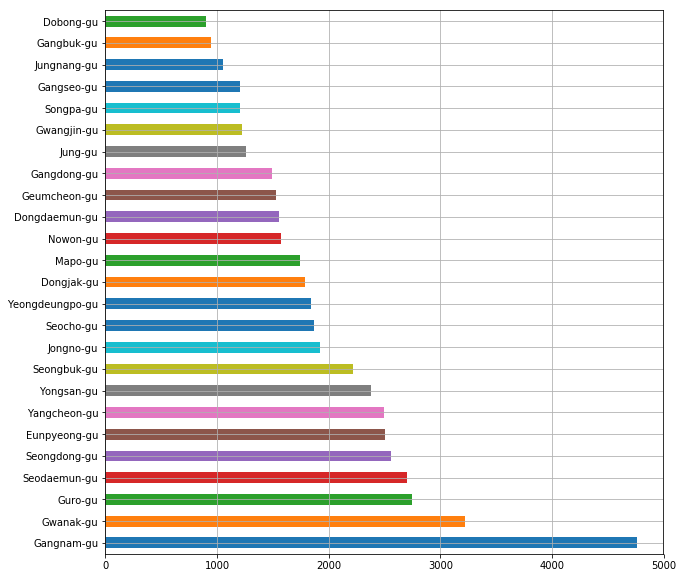

In [38]:
data_result['No. of CCTV'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show() 

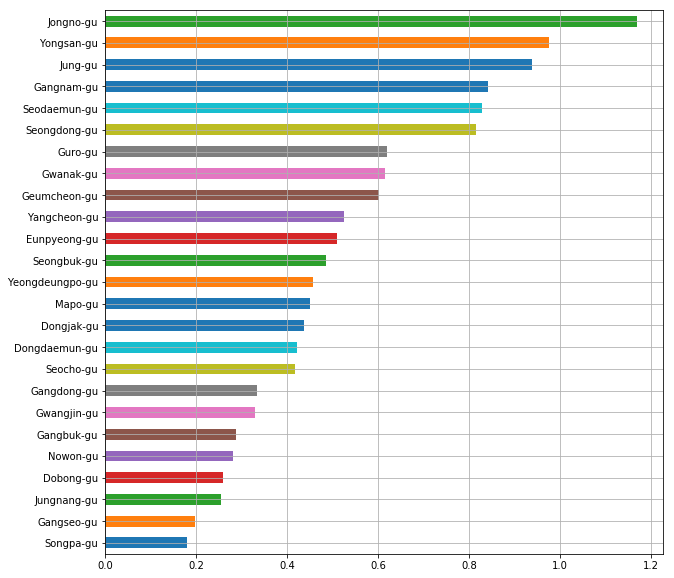

In [39]:
# Conclusion 1: Correlation between the number of CCTVs and population in districts.

data_result['Percentage of CCTV/Population'] = data_result['No. of CCTV'] / data_result['No. of Population'] * 100
data_result['Percentage of CCTV/Population'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))

plt.show() 

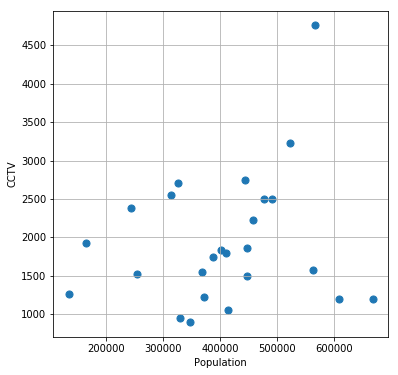

In [40]:
# Conclusion 1: Correlation between the number of CCTVs and population in districts.

plt.figure(figsize=(6,6))
plt.scatter(data_result['No. of Population'], data_result['No. of CCTV'], s=50)
plt.xlabel('Population')
plt.ylabel('CCTV')
plt.grid()
plt.show() 

In [41]:
# Conclusion 1: Correlation between the number of CCTVs and population in districts.

fp1 = np.polyfit(data_result['No. of Population'], data_result['No. of CCTV'], 1)
fp1 

array([1.35949709e-03, 1.39546679e+03])

In [42]:
# Conclusion 1: Correlation between the number of CCTVs and population in districts.

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)


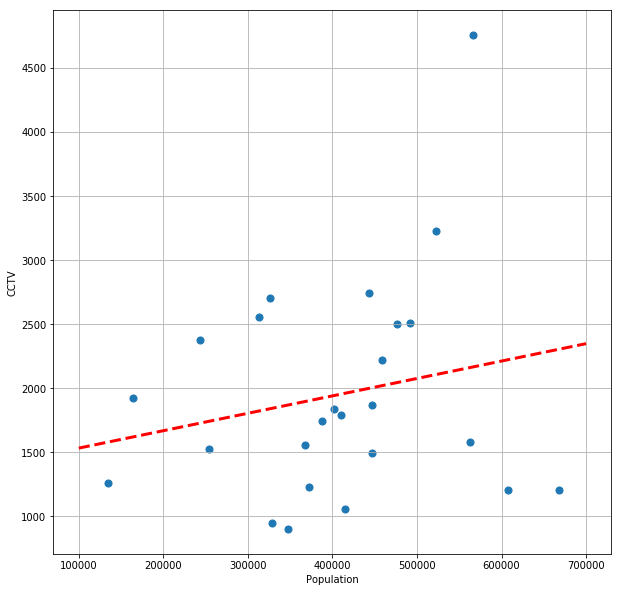

In [43]:
# Conclusion 1: Correlation between the number of CCTVs and population in districts.

plt.figure(figsize=(10,10))
plt.scatter(data_result['No. of Population'], data_result['No. of CCTV'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='r')
plt.xlabel('Population')
plt.ylabel('CCTV')
plt.grid()
plt.show() 

In [53]:
# Conclusion 1: Correlation between the number of CCTVs and population in districts.

fp1 = np.polyfit(data_result['No. of Population'], data_result['No. of CCTV'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['Error'] = np.abs(data_result['No. of CCTV'] - f1(data_result['No. of Population'])) 

df_sort = data_result.sort_values(by='Error', ascending=False)
df_sort.head() 

,District,No. of CCTV,Rate of Increase,No. of Population,No. of Koreans,No. of Foreigners,No. of Senior Citizens (+65yrs),Percentage of Foreigners,Percentage of Senior Citizens,Percentage of CCTV/Population,Error
Gangnam-gu,강남구,4758,93.966572,565731.0,560827.0,4904.0,64579.0,0.866843,11.415143,0.841036,2593.423559
Gwanak-gu,관악구,3223,68.127282,522849.0,505188.0,17661.0,69486.0,3.377839,13.289879,0.616430,1116.721513
Songpa-gu,송파구,1203,35.320585,668366.0,661750.0,6616.0,75301.0,0.989877,11.266432,0.179991,1101.108425
Gangseo-gu,강서구,1202,75.218659,607877.0,601391.0,6486.0,75046.0,1.066992,12.345590,0.197737,1019.873806
Dobong-gu,도봉구,899,35.187970,347338.0,345293.0,2045.0,52909.0,0.588764,15.232713,0.258826,968.671792


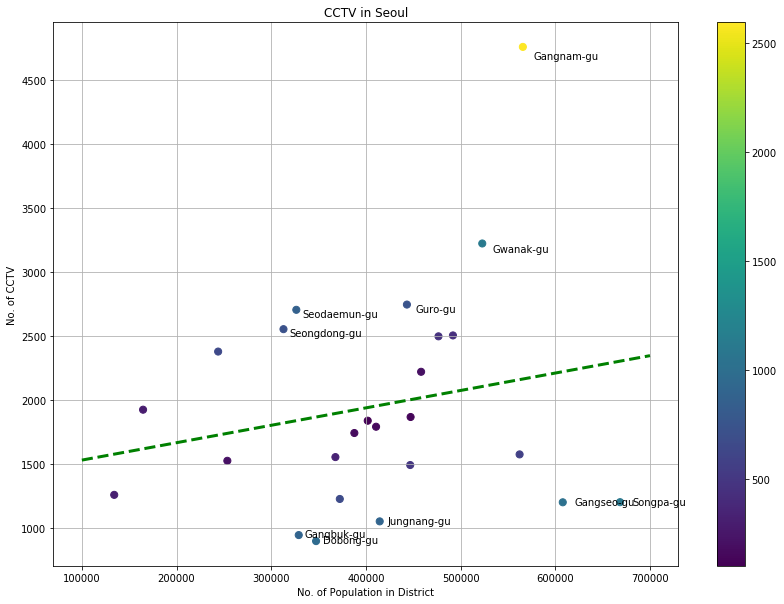

In [60]:
# Conclusion 1: Correlation between the number of CCTVs and population in districts.

plt.figure(figsize=(14,10))
plt.scatter(data_result['No. of Population'], data_result['No. of CCTV'],
           c=data_result['Error'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['No. of Population'][n]*1.02, df_sort['No. of CCTV'][n]*0.98,
            df_sort.index[n], fontsize=10)
    
plt.title('CCTV in Seoul')     
plt.xlabel('No. of Population in District')
plt.ylabel('No. of CCTV')

plt.colorbar() 
plt.grid()
plt.show() 

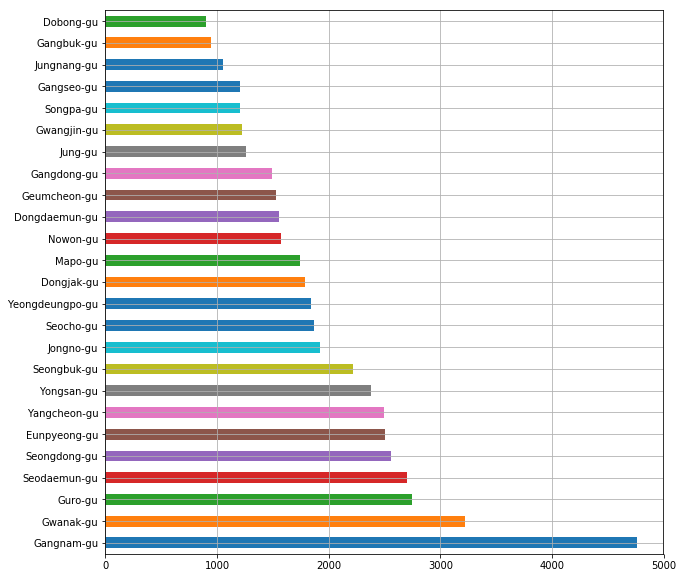

In [67]:
# Conclusion 2: Correlation between the number of CCTVs and high percentage of senior citizen(+65yrs) residents.

data_result['No. of CCTV'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show() 

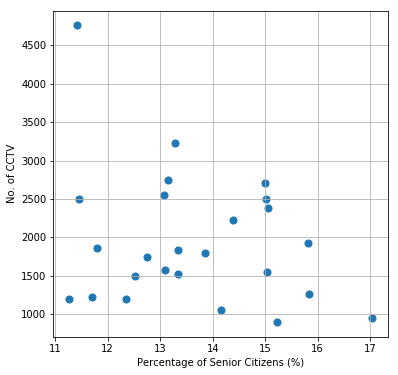

In [76]:
# Conclusion 2: Correlation between the number of CCTVs and high percentage of senior citizen(+65yrs) residents.

plt.figure(figsize=(6,6))
plt.scatter(data_result['Percentage of Senior Citizens'], data_result['No. of CCTV'], s=50) 
plt.xlabel('Percentage of Senior Citizens (%)')
plt.ylabel('No. of CCTV') 
plt.grid()
plt.show() 

In [87]:
# Conclusion 2: Correlation between the number of CCTVs and high percentage of senior citizen(+65yrs) residents.

gp2 = np.polyfit(data_result['Percentage of Senior Citizens'], data_result['No. of CCTV'], 1)
gp2

array([-140.28409405, 3860.97900665])

In [88]:
# Conclusion 2: Correlation between the number of CCTVs and high percentage of senior citizen(+65yrs) residents.

g2 = np.poly1d(gp2)
gx = np.linspace(11, 17, 100)  

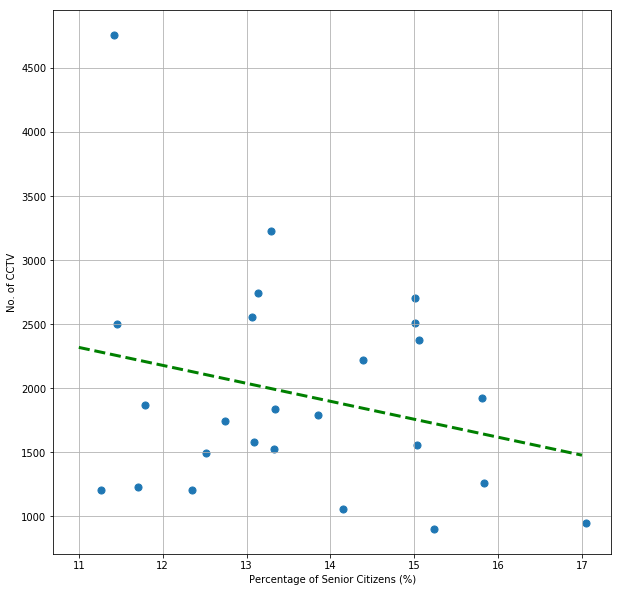

In [89]:
# Conclusion 2: Correlation between the number of CCTVs and high percentage of senior citizen(+65yrs) residents.

plt.figure(figsize=(10,10))
plt.scatter(data_result['Percentage of Senior Citizens'], data_result['No. of CCTV'], s=50)
plt.plot(gx, g2(gx), ls='dashed', lw=3, color='g')
plt.xlabel('Percentage of Senior Citizens (%)')
plt.ylabel('No. of CCTV') 
plt.grid()
plt.show() 

In [90]:
# Conclusion 2: Correlation between the number of CCTVs and high percentage of senior citizen(+65yrs) residents.

gp2 = np.polyfit(data_result['Percentage of Senior Citizens'], data_result['No. of CCTV'], 1)

g2 = np.poly1d(gp2)
gx = np.linspace(11, 17, 100)  

data_result['Error2'] = np.abs(data_result['No. of CCTV'] - g2(data_result['Percentage of Senior Citizens']))

gf_sort = data_result.sort_values(by='Error2', ascending=False)
gf_sort.head() 

,District,No. of CCTV,Rate of Increase,No. of Population,No. of Koreans,No. of Foreigners,No. of Senior Citizens (+65yrs),Percentage of Foreigners,Percentage of Senior Citizens,Percentage of CCTV/Population,Error,Percentage of CCTV/Percentage of Senior Citizens,(CCTV/Percentage of Senior Citizens)%,Error2
Gangnam-gu,강남구,4758,93.966572,565731.0,560827.0,4904.0,64579.0,0.866843,11.415143,0.841036,2593.423559,416.814769,54313.248169,2498.383922
Gwanak-gu,관악구,3223,68.127282,522849.0,505188.0,17661.0,69486.0,3.377839,13.289879,0.616430,1116.721513,242.515374,42833.280354,1226.379644
Songpa-gu,송파구,1203,35.320585,668366.0,661750.0,6616.0,75301.0,0.989877,11.266432,0.179991,1101.108425,106.777373,13553.517534,1077.477819
Gwangjin-gu,광진구,1228,10.630631,372414.0,357743.0,14671.0,43579.0,3.939433,11.701762,0.329741,673.762541,104.941461,14369.763758,991.407923
Seodaemun-gu,서대문구,2705,40.738814,326479.0,314182.0,12297.0,48985.0,3.766552,15.004028,0.828537,865.685958,180.284923,40585.895264,948.847444


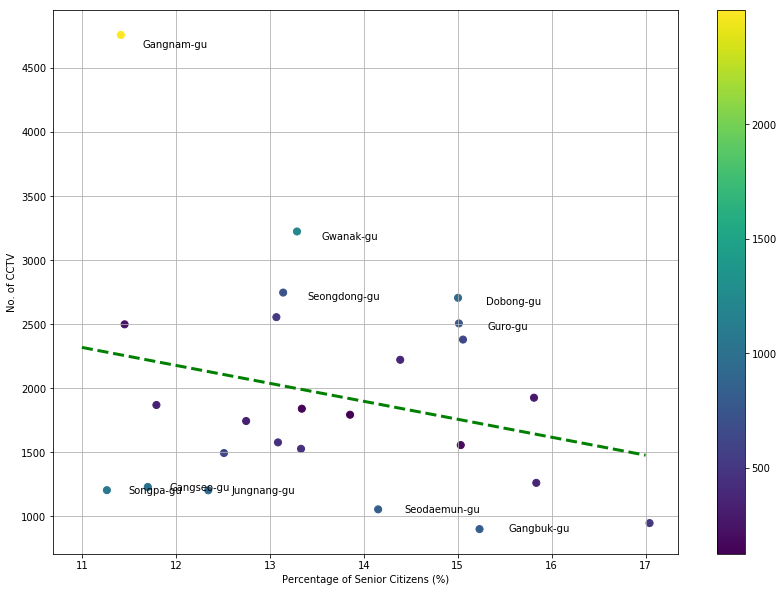

In [91]:
# Conclusion 2: Correlation between the number of CCTVs and high percentage of senior citizen(+65yrs) residents.

plt.figure(figsize=(14,10))
plt.scatter(data_result['Percentage of Senior Citizens'], data_result['No. of CCTV'],
           c=data_result['Error2'], s=50) 
plt.plot(gx, g2(gx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(gf_sort['Percentage of Senior Citizens'][n]*1.02, gf_sort['No. of CCTV'][n]*0.98,
            df_sort.index[n], fontsize=10)
    
plt.xlabel('Percentage of Senior Citizens (%)')
plt.ylabel('No. of CCTV') 

plt.colorbar() 
plt.grid()
plt.show() 